### Implementation of SVM using Stochastic Gradient Descent

In [1]:
# standard imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

import seaborn as sns
sns.set('talk')

### Algorithm for Stochastic Gradient Descent


![title](SVM_Stochastic_Gradient.png)

In [24]:
# Support Vector Machines with Stochastic Gradient Descent

def svm_fit(x,y,eta=0.001,C=0.1,epoch=1000):
    n,m = x.shape
    N = n
    t = np.ones((n,1))
    x_new = np.c_[x,t]
    w = np.zeros(m+1)

    for e in range(epoch):
        for i in range(n):
            idx = np.random.randint(n)
            if y[idx]*(w.T@x_new[idx])<=1:
                w_temp = np.append(w[0:m],0)
                w = w - eta*w_temp + eta*C*N*y[idx]*x_new[idx]
            else:
                w[0:m] -= eta*w[0:m] 

    return w

In [25]:
def visualize_svm(x,y,w):
     def get_hyperplane_value(x, w, offset):
            return (-w[0] * x - w[2] + offset) / w[1]

     fig,ax = plt.subplots(figsize=(10,8))
     ax.scatter(x[:,0], x[:,1], marker='o',c=y,cmap='autumn')

     x0_1 = np.amin(x[:,0])
     x0_2 = np.amax(x[:,0])

     x1_1 = get_hyperplane_value(x0_1, w, 0)
     x1_2 = get_hyperplane_value(x0_2, w, 0)

     x1_1_m = get_hyperplane_value(x0_1, w, -1)
     x1_2_m = get_hyperplane_value(x0_2, w, -1)

     x1_1_p = get_hyperplane_value(x0_1, w, 1)
     x1_2_p = get_hyperplane_value(x0_2, w, 1)

     ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--',label='0') #The mid line
     ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k',label='-1')
     ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'r',label='+1')
     ax.legend()
     ax.set_title('Visualising Support Vector Machines')
     plt.show()



In [26]:
X1, y1 = make_blobs(n_samples=50, centers=2, \
                  random_state=0, cluster_std=0.60)
y_change1 = np.where(y1==1,1,-1)

# Training the network on SVM with SGD
w_f = svm_fit(X1,y_change1)

print(f'Value of weights : {w_f[0:2]} Value of Bias : {w_f[2]:.3f}')

Value of weights : [ 0.27219414 -0.82707313] Value of Bias : 1.910


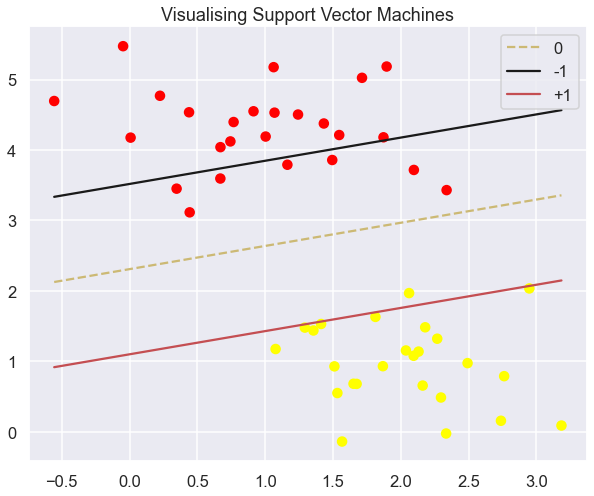

In [27]:
visualize_svm(X1,y_change1,w_f)